In [1]:
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.losses import sparse_categorical_crossentropy
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import KFold
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Model for config.
batch_size = 50
img_width, img_height, img_num_channels = 32, 32, 3
loss_function = sparse_categorical_crossentropy
no_classes = 100
no_epochs = 5
optimizer = Adam()
verbosity = 1
num_folds = 20

In [3]:
# Load CIFAR-10 data
(input_train, target_train), (input_test, target_test) = cifar10.load_data()

In [4]:
# Determine shape of the data
input_shape = (img_width, img_height, img_num_channels)
# Parse numbers as floats
input_train = input_train.astype('float32')
input_test = input_test.astype('float32')
# Normalize data
input_train = input_train / 255
input_test = input_test / 255
# Define per-fold score containers
acc_per_fold = []
loss_per_fold = []
# Merge inputs and targets
inputs = np.concatenate((input_train, input_test), axis=0)
targets = np.concatenate((target_train, target_test), axis=0)
# Define the K-fold Cross Validator
kfold = KFold(n_splits=num_folds, shuffle=True)

In [5]:
# K-fold Cross Validation model evaluation
fold_no = 1
for train, test in kfold.split(inputs, targets):

  # Define the model architecture
  model = Sequential()
  model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Flatten())
  model.add(Dense(256, activation='relu'))
  model.add(Dense(128, activation='relu'))
  model.add(Dense(no_classes, activation='softmax'))

  # Compile the model
  model.compile(loss=loss_function,
                optimizer=optimizer,
                metrics=['accuracy'])


  # Generate a print
  print('------------------------------------------------------------------------')
  print(f'Training for fold {fold_no} ...')

  # Fit data to model
  history = model.fit(inputs[train], targets[train],
              batch_size=batch_size,
              epochs=no_epochs,
              verbose=verbosity)

  # Generate generalization metrics
  scores = model.evaluate(inputs[test], targets[test], verbose=0)
  print(f'Score for fold {fold_no}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')
  acc_per_fold.append(scores[1] * 100)
  loss_per_fold.append(scores[0])

  # Increase fold number
  fold_no = fold_no + 1

2022-04-09 14:33:37.597772: I tensorflow/core/platform/cpu_feature_guard.cc:145] This TensorFlow binary is optimized with Intel(R) MKL-DNN to use the following CPU instructions in performance critical operations:  SSE4.1 SSE4.2
To enable them in non-MKL-DNN operations, rebuild TensorFlow with the appropriate compiler flags.
2022-04-09 14:33:37.600203: I tensorflow/core/common_runtime/process_util.cc:115] Creating new thread pool with default inter op setting: 8. Tune using inter_op_parallelism_threads for best performance.


------------------------------------------------------------------------
Training for fold 1 ...
Train on 57000 samples
Epoch 1/5
57000/57000 [==============================] - 143s 3ms/sample - loss: 1.4969 - accuracy: 0.4624
Epoch 2/5
57000/57000 [==============================] - 140s 2ms/sample - loss: 1.0923 - accuracy: 0.6144
Epoch 3/5
57000/57000 [==============================] - 144s 3ms/sample - loss: 0.9341 - accuracy: 0.6708
Epoch 4/5
57000/57000 [==============================] - 141s 2ms/sample - loss: 0.8241 - accuracy: 0.7100
Epoch 5/5
57000/57000 [==============================] - 141s 2ms/sample - loss: 0.7303 - accuracy: 0.7447
Score for fold 1: loss of 0.8819084882736206; accuracy of 70.06666660308838%
------------------------------------------------------------------------
Training for fold 2 ...
Train on 57000 samples
Epoch 1/5
57000/57000 [==============================] - 137s 2ms/sample - loss: 1.4431 - accuracy: 0.4768
Epoch 2/5
57000/57000 [==================

KeyboardInterrupt: 

------------------------------------------------------------------------
Score per fold
------------------------------------------------------------------------
> Fold 1 - Loss: 0.8819084882736206 - Accuracy: 70.06666660308838%


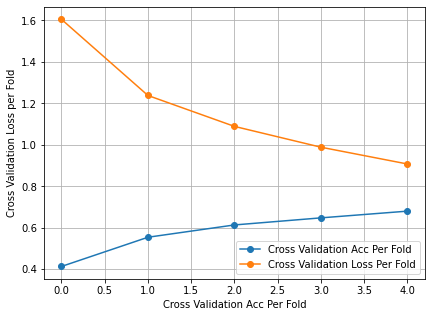

------------------------------------------------------------------------
> Fold 2 - Loss: 0.9158965644836425 - Accuracy: 67.79999732971191%


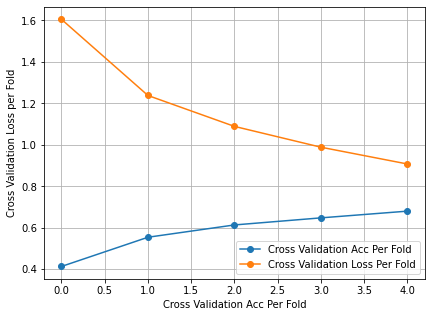

------------------------------------------------------------------------
> Fold 3 - Loss: 0.9547767043113708 - Accuracy: 66.8333351612091%


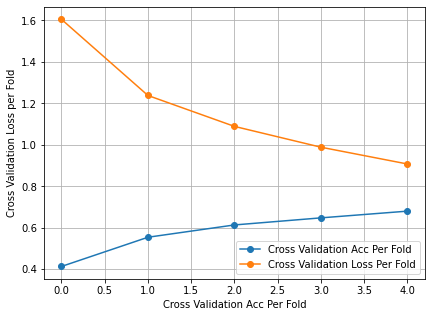

------------------------------------------------------------------------
> Fold 4 - Loss: 0.9320074218114217 - Accuracy: 68.03333163261414%


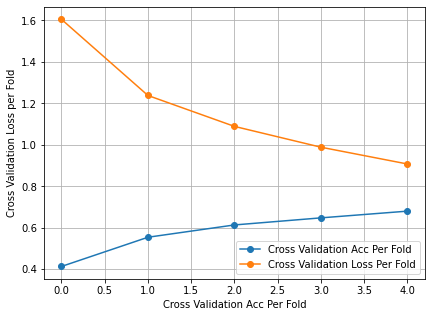

------------------------------------------------------------------------
> Fold 5 - Loss: 1.0427689757347107 - Accuracy: 63.866668939590454%


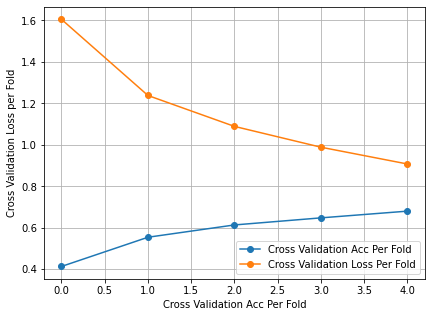

------------------------------------------------------------------------
Average scores for all folds:
> Accuracy: 67.3199999332428 (+- 2.0221649270642708)
> Loss: 0.9454716309229532
------------------------------------------------------------------------


In [6]:
# == Provide average scores ==
print('------------------------------------------------------------------------')
print('Score per fold')
for i in range(0, len(acc_per_fold)):
  print('------------------------------------------------------------------------')
  print(f'> Fold {i+1} - Loss: {loss_per_fold[i]} - Accuracy: {acc_per_fold[i]}%')
  plt.figure(figsize=(15,5))
  plt.subplot(1,2,1)
  plt.plot(history.history['accuracy'], 'o-', label='Cross Validation Acc Per Fold')
  plt.plot(history.history['loss'], 'o-', label = 'Cross Validation Loss Per Fold')
  plt.xlabel('Cross Validation Acc Per Fold')
  plt.ylabel('Cross Validation Loss per Fold')
  plt.grid(True)
  plt.legend(loc='lower right')
  plt.show() 
print('------------------------------------------------------------------------')
print('Average scores for all folds:')
print(f'> Accuracy: {np.mean(acc_per_fold)} (+- {np.std(acc_per_fold)})')
print(f'> Loss: {np.mean(loss_per_fold)}')
print('------------------------------------------------------------------------')